In [3]:
!pwd

/home/hyuksu/projects/ml/deeplearning study


In [2]:
from zipfile import ZipFile

In [6]:
from tensorflow.keras.datasets import fashion_mnist
(train_x,train_y),(test_x,test_y)=fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


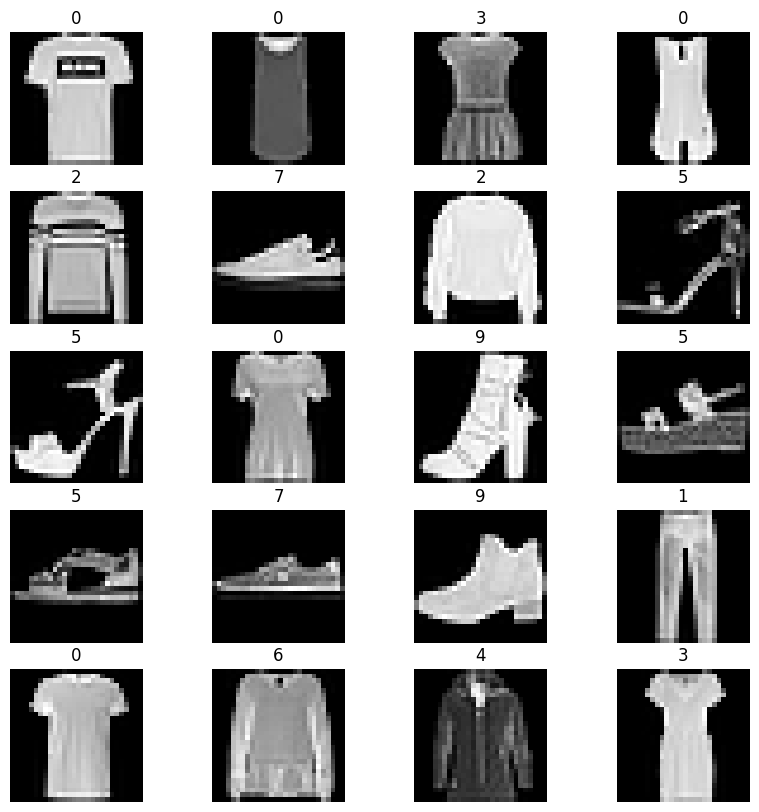

In [50]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(1,21,1):
    plt.subplot(5,4,i)
    plt.imshow(train_x[i],cmap='gray')
    plt.axis('off')
    plt.title(f'{train_y[i]}')
plt.show()
    

In [17]:
train_x.shape

(60000, 28, 28)

In [24]:
import pandas as pd 
import numpy as np

df=pd.DataFrame({'y':train_y})
df['y'].value_counts()

y
9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
Name: count, dtype: int64

In [37]:
# mlp설계

from tensorflow.keras.models import Sequential

from tensorflow.keras.layers import Flatten,Dense,InputLayer,Dropout
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
early=EarlyStopping(monitor='val_accuracy',restore_best_weights=True,verbose=1,patience=5)
check=ModelCheckpoint(filepath='/home/hyuksu/projects/ml/deeplearning study/model_save/model{val_accuracy:.4f}.keras',monitor='val_accuracy',save_best_only=True,verbose=1)


mlp=Sequential()
mlp.add(InputLayer(input_shape=(28,28)))
mlp.add(Flatten())
mlp.add(Dense(units=128,activation='relu'))
mlp.add(Dropout(0.2))
mlp.add(Dense(units=256,activation='relu'))
mlp.add(Dense(units=64,activation='relu'))
mlp.add(Dense(units=32,activation='relu'))
mlp.add(Dense(units=10,activation='softmax'))
#학습 방식

mlp.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
mlp.summary()



Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 152,362 (595.16 KB)

 Trainable params: 152,362 (595.16 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#학습 시작

h=mlp.fit(train_x,train_y,callbacks=[early,check],validation_split=0.2,epochs=20,batch_size=64)

Epoch 1/20
729/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5835 - loss: 5.4034
Epoch 1: val_accuracy improved from None to 0.81117, saving model to /home/hyuksu/projects/ml/deeplearning study/model_save/model0.8112.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6856 - loss: 1.7280 - val_accuracy: 0.8112 - val_loss: 0.5439
Epoch 2/20
739/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7767 - loss: 0.6274
Epoch 2: val_accuracy improved from 0.81117 to 0.82925, saving model to /home/hyuksu/projects/ml/deeplearning study/model_save/model0.8292.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7875 - loss: 0.5985 - val_accuracy: 0.8292 - val_loss: 0.4810
Epoch 3/20
744/750 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.5464
Epoch 3: val_accuracy improved from 0.82925 to 0.84292, saving model to /home/hyuksu/projects/ml/deeplearning study/model_save/model0.8429.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8106 - loss: 0.5267 -

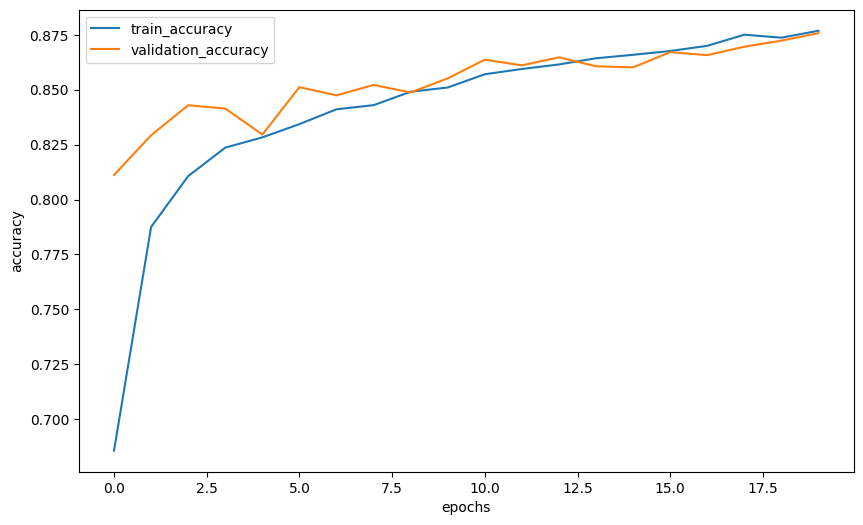

In [41]:
plt.figure(figsize=(10,6))
plt.plot(h.history['accuracy'],label='train_accuracy')
plt.plot(h.history['val_accuracy'],label='validation_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

In [42]:
pre=mlp.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 973us/step


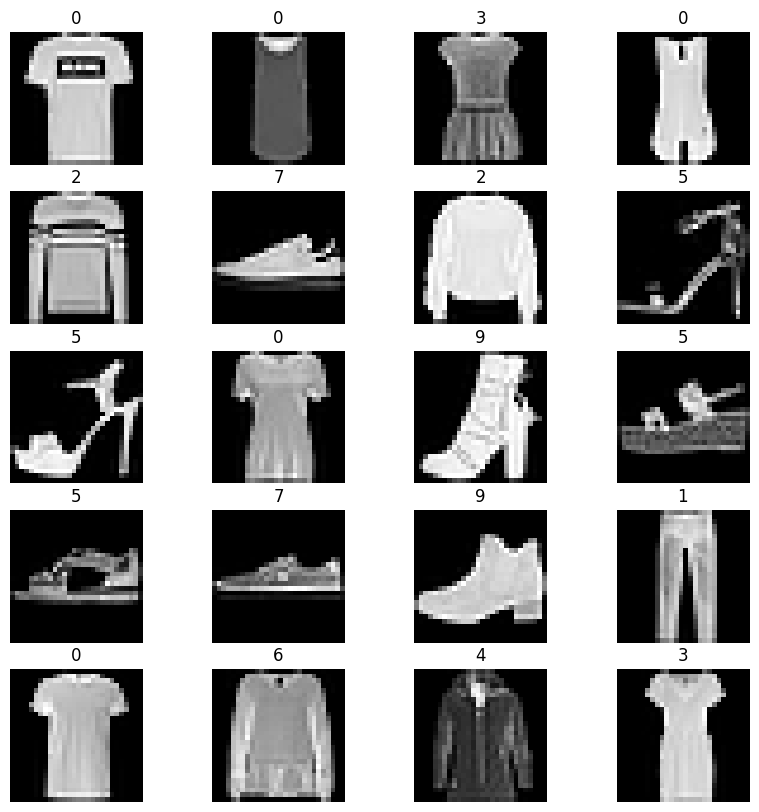

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(1,21,1):
    plt.subplot(5,4,i)
    plt.imshow(train_x[i],cmap='gray')
    plt.axis('off')
    plt.title(f'{train_y[i]}')
plt.show()
    

In [58]:
a=pre[0].argmax()
a.astype('uint8')

np.uint8(9)

In [55]:
test_y[0]

np.uint8(9)

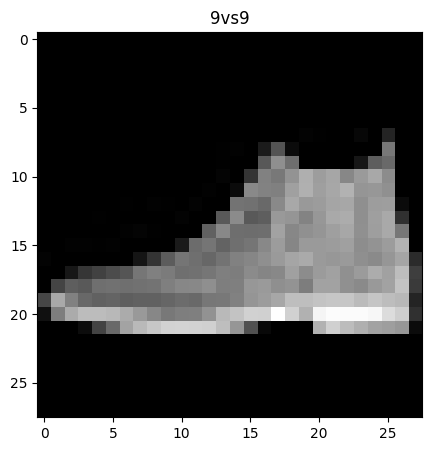

In [61]:
plt.figure(figsize=(10,5))
plt.imshow(test_x[0],cmap='gray')
plt.title(f'{test_y[0]}vs{a}')
plt.show()

In [64]:
from tensorflow.keras.models import load_model
model=load_model('/home/hyuksu/projects/ml/deeplearning study/model_save/model0.8512.keras')
pred1=model.predict(test_x)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 990us/step


In [65]:
pred1[0].argmax()

np.int64(9)

In [67]:
e=mlp.evaluate(test_x,test_y)
e1=model.evaluate(test_x,test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8676 - loss: 0.3841
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8453 - loss: 0.4455


In [69]:
a=mlp.get_weights()

In [79]:
weights = mlp.get_weights()

layer = 1
for idx, w in enumerate(weights):
    if idx % 2 == 0:
        print(f'{layer}층 Weight matrix shape: {w.shape}')
    else:
        print(f'{layer}층 Bias vector shape: {w.shape}')
        layer += 1

1층 Weight matrix shape: (784, 128)
1층 Bias vector shape: (128,)
2층 Weight matrix shape: (128, 256)
2층 Bias vector shape: (256,)
3층 Weight matrix shape: (256, 64)
3층 Bias vector shape: (64,)
4층 Weight matrix shape: (64, 32)
4층 Bias vector shape: (32,)
5층 Weight matrix shape: (32, 10)
5층 Bias vector shape: (10,)


In [82]:
import numpy as np

np.savez_compressed('/home/hyuksu/projects/ml/deeplearning study/data/fashion.npz',train_x=train_x,train_y=train_y,test_x=test_x,test_y=test_y)

In [83]:
data=np.load('/home/hyuksu/projects/ml/deeplearning study/data/fashion.npz')

In [84]:
data.keys

<bound method NpzFile.keys of NpzFile '/home/hyuksu/projects/ml/deeplearning study/data/fashion.npz' with keys: train_x, train_y, test_x, test_y>

In [86]:
train_x=data['train_x']

In [87]:
train_x

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 